> 2번 카테고리 선정 설명해야해 
카테고리1=제조 국가, 카테고리2=제조사, 뭐 이런 걸로 생각하면 된다. 
아니면 식품류-유제품-치즈-> 상품의 다양성  
ex) A고객의 데이터 식품류.유제품.치즈, 식품류.유제품.우유, 식품류.유제품.우유 -> 2개 카테고리 구입

디지털프라자 A지점에서 최근 연휴 직전에 재고 처리와 매출 신장을 위해 대대적인 할인 행사를 하였다. 하루만 반짝 진행한 행사에서 예상보다 많은 손님이 방문했고 이번에 발생한 매출데이터를 취합하여 향후 발송할 판촉물에 들어갈 컨텐츠를 기획하고자 한다. 취합한 데이터는 다음과 같다.

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
import pandas as pd
df_origin = pd.read_csv("../Datasets/sales_pos.csv")
df_origin.head(2)

,user,prod,gender,age_group,job,city,marital,prod_cat1,prod_cat2,prod_cat3,purchase
0,1,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370
1,1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200


### Q1. 매출액이 가장 큰 상품을 확인하고 해당 상품을 가장 많이 구매하는 직업을 확인하시오.
※ 분석 결과를 기반으로 job 변수의 번호를 최종 출력하시오.  
(정답 예시: 1)

In [5]:
df1 = df_origin.copy()

In [6]:
df1 = df1[["job", "prod", "purchase"]].copy()
df1.head(2)

,job,prod,purchase
0,10,P00069042,8370
1,10,P00248942,15200


Q. prod가 중복되면 prod별로 매출액의 합을 봐야할 듯, 확인해보자

In [7]:
df1['prod'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: prod, Length: 3631, dtype: int64

> 그룹바이 써야겠네

In [8]:
df1.groupby('prod')['purchase'].sum().idxmax()

'P00025442'

!주의

In [9]:
df1.groupby('prod')['purchase'].sum().sort_values(ascending=False).idxmax()

'P00025442'

> sort_values 꼭 하고 해야 한다. idxmax 할 때 중복으로 가장 높은 데이터가 있으면 첫번째 인덱스만 가져온다

In [10]:
pd.Series(index=['a','b','c'], data=[1,4,4])

a    1
b    4
c    4
dtype: int64

In [11]:
pd.Series(index=['a','b','c'], data=[1,4,4]).idxmax()

'b'

---

In [12]:
str_prod_high=df1.groupby('prod')['purchase'].sum().sort_values(ascending=False).idxmax()

In [13]:
df1.loc[df1['prod']==str_prod_high, 'job']

667       17
749        7
833        7
1134       1
1205      12
          ..
544755     7
544780     4
545079    17
545206     2
545665     0
Name: job, Length: 1615, dtype: int64

In [14]:
df1.loc[df1['prod']==str_prod_high, 'job'].value_counts()

4     221
7     187
0     179
17    143
1     124
12    117
14     84
2      78
20     75
16     60
10     55
6      54
15     50
3      46
11     38
5      31
13     24
19     20
18     14
9      12
8       3
Name: job, dtype: int64

In [15]:
df1.loc[df1['prod']==str_prod_high, 'job'].value_counts(ascending=False).idxmax()

4

In [ ]:
# df1.groupby('job')['purchase'].sum().idxmax()

### A. 4

### Q2. 결혼 여부(marital)에 따라 구매하는 물품의 종류가 많이 차이 나는지 확인하고자 한다. 비교적 신혼부부가 많은 26-35세 그룹을 대상으로 각 고객의 구매물품 카테고리 개수를 산출하고 결혼여부별로 그 평균값의 차이를 산출하시오.
※ 구매 물품의 카테고리 개수 산출에는 prod_cat1, prod_cat2, prod_cat3 변수를 사용한다.  
※ 카테고리 관련 변수의 결측치는 0으로 대치한다.  
※ 결측치를 대치한 데이터까지 포함하여 문제를 풀이하시오.  
※ 카테고리 관련 변수의 처리 예시는 다음과 같다.  
<div style='width:300px;'>
    
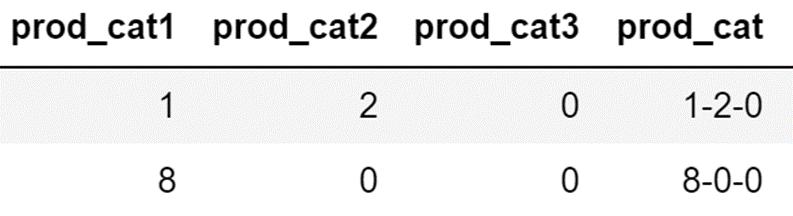
    
</div>
    
※ 고객 식별자가 1인 고객은 총 21개 카테고리의 물품을 구매하였다.  
※ 정답은 절대값을 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [94]:
df2 = df_origin.copy()

In [95]:
df2.head(2)

,user,prod,gender,age_group,job,city,marital,prod_cat1,prod_cat2,prod_cat3,purchase
0,1,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370
1,1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200


※ 카테고리 관련 변수의 결측치는 0으로 대치한다.  

※ 결측치를 대치한 데이터까지 포함하여 문제를 풀이하시오.  

In [96]:
col_derive=['prod_cat1','prod_cat2','prod_cat3']

In [97]:
df2[col_derive]=df2[col_derive].fillna(0)

In [98]:
df2.head(2)

,user,prod,gender,age_group,job,city,marital,prod_cat1,prod_cat2,prod_cat3,purchase
0,1,P00069042,F,0-17,10,A,0,3,0.0,0.0,8370
1,1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200



※ 구매 물품의 카테고리 개수 산출에는 prod_cat1, prod_cat2, prod_cat3 변수를 사용한다.  

In [99]:
df2[col_derive].apply(lambda s:s.astype('str')).sum(axis=1)

0           30.00.0
1          16.014.0
2          120.00.0
3         1214.00.0
4           80.00.0
            ...    
550063     200.00.0
550064     200.00.0
550065     200.00.0
550066     200.00.0
550067     200.00.0
Length: 550068, dtype: object

In [100]:
df2['unique_cate']=df2[col_derive].apply(lambda s:s.astype('str')).sum(axis=1)

※ 고객 식별자가 1인 고객은 총 21개 카테고리의 물품을 구매하였다.  

In [101]:
df2.loc[df2['user']==1, 'unique_cate']

0           30.00.0
1          16.014.0
2          120.00.0
3         1214.00.0
39180       24.08.0
78144       48.09.0
78145       12.05.0
78146      34.012.0
116848     515.00.0
116849      50.00.0
116850      80.00.0
116851      34.05.0
155570      80.00.0
155571     68.016.0
155572     34.012.0
194558     18.017.0
194559      48.00.0
233726     140.00.0
233727      80.00.0
233728      80.00.0
272808      80.00.0
311709      80.00.0
311710      34.00.0
311711     817.00.0
311712      34.00.0
311713      34.00.0
350797      34.05.0
390150     120.00.0
390151     160.00.0
428893      12.09.0
428894     34.012.0
467663     34.012.0
467664      80.00.0
506601     34.012.0
545915     200.00.0
Name: unique_cate, dtype: object

In [102]:
df2.loc[df2['user']==1, 'unique_cate'].nunique()

21

비교적 신혼부부가 많은 26-35세 그룹을 대상으로 각 고객의 구매물품 카테고리 개수를 산출하고 결혼여부별로 그 평균값의 차이를 산출하시오.  
※ 정답은 절대값을 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [103]:
df2.head(2)

,user,prod,gender,age_group,job,city,marital,prod_cat1,prod_cat2,prod_cat3,purchase,unique_cate
0,1,P00069042,F,0-17,10,A,0,3,0.0,0.0,8370,30.00.0
1,1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200,16.014.0


In [104]:
df2.age_group.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [105]:
df2 = df2.loc[df2.age_group=='26-35']

In [106]:
df2.groupby(['user','marital'])['unique_cate'].nunique()

user  marital
3     0           18
5     1           43
8     1           32
9     0           31
11    0           34
                ... 
6030  1           33
6034  0            8
6035  0           61
6036  1          123
6040  0           60
Name: unique_cate, Length: 2053, dtype: int64

> 어차피 결혼여부는 하나니깐 groupby에 넣어도 괜찮음, 아니면 merge 해도 됨, 답 구하고 merge로도 해보겠습니다

In [28]:
s_groupby=df2.groupby(['user','marital'])['unique_cate'].nunique()

In [109]:
s_groupby.head()

user  marital
3     0          18
5     1          43
8     1          32
9     0          31
11    0          34
Name: unique_cate, dtype: int64

In [30]:
s_groupby.groupby('marital').mean()

marital
0    41.663183
1    41.792336
Name: unique_cate, dtype: float64

In [31]:
s_groupby.groupby('marital').mean().diff().abs().round(2)

marital
0     NaN
1    0.13
Name: unique_cate, dtype: float64

### A. 0.13

- merge로 하는 거 

In [87]:
s_user=df2.groupby('user')['unique_cate'].nunique()
s_user

user
1        21
2        37
3        18
4        13
5        43
       ... 
6036    123
6037     48
6038      9
6039     40
6040     60
Name: unique_cate, Length: 5891, dtype: int64

In [89]:
df2[['user','marital']]

,user,marital
0,1,0
1,1,0
2,1,0
3,1,0
4,2,0
...,...,...
550063,6033,1
550064,6035,0
550065,6036,1
550066,6038,0


In [92]:
df_user_drop_duplicate=df2[['user','marital']].drop_duplicates()
df_user_drop_duplicate

,user,marital
0,1,0
4,2,0
5,3,0
6,4,1
9,5,1
...,...,...
185450,4588,0
187076,4871,0
221494,4113,0
229480,5391,0


In [88]:
df_merge=pd.merge(left=s_user, right=df_user_drop_duplicate, left_index=True, right_on='user', how='left')
df_merge

,unique_cate,user,marital
0,21,1,0
4,37,2,0
5,18,3,0
6,13,4,1
9,43,5,1
...,...,...,...
39124,123,6036,1
39153,48,6037,0
155550,9,6038,0
39161,40,6039,1


In [33]:
df_merge.groupby('marital')['unique_cate'].agg(['mean']).diff().abs().round(2)

,mean
marital,
0,NaN
1,0.13


### Q3. 고객을 군집화 하여 각 군집별로 마케팅 전략을 수립하고자 한다. 다음에 제시된 변수를 대상으로 k-means 군집분석을 실시하고 7개 군집으로 분석했을 때 Silhouette score 를 산출하시오.
<독립 변수>
 - 구매 상품 종류
 - 성별
 - 나이
 - 직업 
 - 도시
 - 결혼 여부
 - 총 구매금액

※ 구매 상품 종류 변수는 "prod" 변수를 참고하여 생성하시오.  
※ 성별 변수는 "gender" 변수에서 "M"을 1, "F"를 0으로 변환하여 사용하시오.  
※ 나이는 "age_group" 변수에서 나이가 가장 적은 그룹을 0으로 지정하고 가장 나이가 많은 그룹은 6으로 지정하는 방식으로 순서형 변수로 변환하시오.  
※ 직업과 도시 변수는 One Hot Encoding 변환하여 사용하시오.  
※ 군집 분석에 사용되는 변수는 총 29개이며 MinMax 정규화 후 분석하시오.  
※ seed는 123으로 지정하시오.  
※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

In [34]:
df3 = df_origin.copy()
df3.head(2)

,user,prod,gender,age_group,job,city,marital,prod_cat1,prod_cat2,prod_cat3,purchase
0,1,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370
1,1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200


※ seed는 123으로 지정하시오.  
7개 군집으로 분석했을 때

In [35]:
#params
k, seed = 7, 123

고객별이니깐!!!!!!!!!!!!!!!!!!! 고객 기준으로 한 행에 한 사람이 나와야 된다. 고객 기준 중복되는 데이터를 일단 없애자.

In [36]:
df3=df3.drop(columns=col_derive)

In [37]:
df3['user'].nunique()

5891

> 5891 유저에 대해 df를 만들어야 한다

In [38]:
df3[df3.user==1]

,user,prod,gender,age_group,job,city,marital,purchase
0,1,P00069042,F,0-17,10,A,0,8370
1,1,P00248942,F,0-17,10,A,0,15200
2,1,P00087842,F,0-17,10,A,0,1422
3,1,P00085442,F,0-17,10,A,0,1057
39180,1,P00085942,F,0-17,10,A,0,12842
78144,1,P00102642,F,0-17,10,A,0,2763
78145,1,P00110842,F,0-17,10,A,0,11769
78146,1,P00004842,F,0-17,10,A,0,13645
116848,1,P00117942,F,0-17,10,A,0,8839
116849,1,P00258742,F,0-17,10,A,0,6910


> prod 랑 purchase 컬럼 빼고 다 똑같아 보이네 확인해보자

In [39]:
df_user=df3.drop(columns=['prod','purchase']).drop_duplicates()

In [40]:
df_user

,user,gender,age_group,job,city,marital
0,1,F,0-17,10,A,0
4,2,M,55+,16,C,0
5,3,M,26-35,15,A,0
6,4,M,46-50,7,B,1
9,5,M,26-35,20,A,1
...,...,...,...,...,...,...
185450,4588,F,26-35,4,C,0
187076,4871,M,18-25,12,C,0
221494,4113,M,36-45,17,C,0
229480,5391,M,26-35,7,A,0


> 5891 맞네

※ 성별 변수는 "gender" 변수에서 "M"을 1, "F"를 0으로 변환하여 사용하시오.  
※ 나이는 "age_group" 변수에서 나이가 가장 적은 그룹을 0으로 지정하고 가장 나이가 많은 그룹은 6으로 지정하는 방식으로 순서형 변수로 변환하시오.  

In [41]:
df_user['gender']=df_user['gender'].replace({'M':1, 'F':0})

In [42]:
df_user['age_group'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
dict_age=dict(pd.Series([0, 6, 2, 4, 5, 3, 1], index=df_user['age_group'].unique() ))

In [44]:
dict_age

{'0-17': 0,
 '55+': 6,
 '26-35': 2,
 '46-50': 4,
 '51-55': 5,
 '36-45': 3,
 '18-25': 1}

In [45]:
df_user['age_group']=df_user['age_group'].replace(dict_age)

※ 직업과 도시 변수는 One Hot Encoding 변환하여 사용하시오.  

In [46]:
df_user.columns

Index(['user', 'gender', 'age_group', 'job', 'city', 'marital'], dtype='object')

In [47]:
pd.get_dummies(df_user)

,user,gender,age_group,job,marital,city_A,city_B,city_C
0,1,0,0,10,0,1,0,0
4,2,1,6,16,0,0,0,1
5,3,1,2,15,0,1,0,0
6,4,1,4,7,1,0,1,0
9,5,1,2,20,1,1,0,0
...,...,...,...,...,...,...,...,...
185450,4588,0,2,4,0,0,0,1
187076,4871,1,1,12,0,0,0,1
221494,4113,1,3,17,0,0,0,1
229480,5391,1,2,7,0,1,0,0


> 엥 job은 안됐네 get dummies가 dtype보고 결정함

In [48]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 243533
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       5891 non-null   int64 
 1   gender     5891 non-null   int64 
 2   age_group  5891 non-null   int64 
 3   job        5891 non-null   int64 
 4   city       5891 non-null   object
 5   marital    5891 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 322.2+ KB


In [49]:
df_user['job']=df_user['job'].astype('str')

In [50]:
df_user=pd.get_dummies(df_user)

※ 구매 상품 종류 변수는 "prod" 변수를 참고하여 생성하시오.  

In [51]:
s_prod_nunique=df3.groupby('user')['prod'].nunique()

In [52]:
s_prod_nunique

user
1        35
2        77
3        29
4        14
5       106
       ... 
6036    514
6037    122
6038     12
6039     74
6040    180
Name: prod, Length: 5891, dtype: int64

In [53]:
df_user

,user,gender,age_group,marital,job_0,job_1,job_10,job_11,job_12,job_13,...,job_3,job_4,job_5,job_6,job_7,job_8,job_9,city_A,city_B,city_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,4,1,4,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,5,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185450,4588,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
187076,4871,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
221494,4113,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
229480,5391,1,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [54]:
df_user=df_user.merge(s_prod_nunique, how='left', right_index=True, left_on='user')

독립변수 총 구매금액

In [55]:
s_sum_purchase = df3.groupby('user')['purchase'].sum()

In [56]:
s_sum_purchase

user
1        334093
2        810472
3        341635
4        206468
5        821001
         ...   
6036    4116058
6037    1119538
6038      90034
6039     590319
6040    1653299
Name: purchase, Length: 5891, dtype: int64

In [57]:
df_user=df_user.merge(s_sum_purchase,  how='left', right_index = True, left_on='user')

In [58]:
df_user

,user,gender,age_group,marital,job_0,job_1,job_10,job_11,job_12,job_13,...,job_5,job_6,job_7,job_8,job_9,city_A,city_B,city_C,prod,purchase
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,35,334093
4,2,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,77,810472
5,3,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,29,341635
6,4,1,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,14,206468
9,5,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,106,821001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185450,4588,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20,140990
187076,4871,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,12,108545
221494,4113,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,20,213550
229480,5391,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,7,60182


※ 군집 분석에 사용되는 변수는 총 29개이며 MinMax 정규화 후 분석하시오.  

In [59]:
df_user=df_user.drop(columns='user')

In [60]:
scaler_mm = MinMaxScaler()

In [61]:
df_user=scaler_mm.fit_transform(df_user)

k-means 군집분석을 실시하고 7개 군집으로 분석했을 때 Silhouette score 를 산출하시오.  
※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.    
(정답 예시: 0.12)

In [62]:
model_kmeans=KMeans(n_clusters=k, random_state=seed)

In [63]:
model_kmeans.fit(df_user)

C:\Users\beluga\miniconda3\envs\s0921\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=123)

In [64]:
model_kmeans.labels_

array([3, 1, 3, ..., 1, 3, 5])

In [65]:
silhouette_score(df_user, model_kmeans.labels_)

0.17924689113287728

In [66]:
round(silhouette_score(df_user, model_kmeans.labels_), 2)

0.18